In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing 

In [2]:
# Collect all data frames and concatenate them into a single data frame 
df1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', delimiter=',', error_bad_lines=False)
df2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', delimiter=',', error_bad_lines=False)
df3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', delimiter=',', error_bad_lines=False)
df4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', delimiter=',', error_bad_lines=False)

chicago_crime = pd.concat([df1, df2, df3, df4])

nRow, nCol = chicago_crime.shape
print(f'There are {nRow} rows and {nCol} columns')

chicago_crime

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


There are 7941282 rows and 23 columns


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016.0,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016.0,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016.0,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016.0,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [3]:
df = chicago_crime

In [4]:
df = df.reset_index().drop(columns=['Unnamed: 0', 'index'])

### Data Summary

In [5]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"


In [6]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

#### Column summary

**ID** - Unique identifier for the record.

**Case Number** - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

**Date** - Date when the incident occurred. this is sometimes a best estimate.

**Block** - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

**IUCR** - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

**Primary Type** - The primary description of the IUCR code.

**Description** - The secondary description of the IUCR code, a subcategory of the primary description.

**Location Description** - Description of the location where the incident occurred.

**Arrest** - Indicates whether an arrest was made.

**Domestic** - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

**Beat** - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

**District** - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

**Ward** - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

**Community Area** - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

**FBI Code** - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

**X Coordinate** - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**Y Coordinate** - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

**Year** - Year the incident occurred.

**Updated On** - Date and time the record was last updated.

**Latitude** - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**Longitude** - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

**Location** - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

In [7]:
col_to_keep = ['ID', 'Date', 'Primary Type', 'Location Description', 'Arrest', 'Domestic']

In [8]:
df = df[col_to_keep] #Drop the columns which we will not be using 

In [9]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4786321,01/01/2004 12:01:00 AM,THEFT,RESIDENCE,False,False
1,4676906,03/01/2003 12:00:00 AM,OTHER OFFENSE,RESIDENCE,False,True
2,4789749,06/20/2004 11:00:00 AM,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
3,4789765,12/30/2004 08:00:00 PM,THEFT,OTHER,False,False
4,4677901,05/01/2003 01:00:00 AM,THEFT,RESIDENCE,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941282 entries, 0 to 7941281
Data columns (total 6 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   ID                    int64 
 1   Date                  object
 2   Primary Type          object
 3   Location Description  object
 4   Arrest                bool  
 5   Domestic              bool  
dtypes: bool(2), int64(1), object(3)
memory usage: 257.5+ MB


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p') #Change date to a more standard format

In [12]:
df

,ID,Date,Primary Type,Location Description,Arrest,Domestic
0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,False,False
1,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,False,True
2,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
3,4789765,2004-12-30 20:00:00,THEFT,OTHER,False,False
4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,False,False
...,...,...,...,...,...,...
7941277,10508679,2016-05-03 23:33:00,BATTERY,APARTMENT,True,True
7941278,10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,APARTMENT,True,True
7941279,10508681,2016-05-03 00:15:00,BATTERY,SIDEWALK,False,False
7941280,10508690,2016-05-03 21:07:00,BATTERY,SIDEWALK,False,True


In [13]:
df.index = pd.DatetimeIndex(df["Date"]) #Make date as index

In [30]:
df.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2004-01-01 00:01:00,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,False,False
2003-03-01 00:00:00,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,False,True
2004-06-20 11:00:00,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False
2004-12-30 20:00:00,4789765,2004-12-30 20:00:00,THEFT,OTHER,False,False
2003-05-01 01:00:00,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,False,False


In [15]:
for feature in df.columns:
    print('{} : {}'.format(feature, df[feature].isnull().any()))

ID : False
Date : False
Primary Type : False
Location Description : True
Arrest : False
Domestic : False


In [16]:
df[df['Location Description'].isnull()]

,ID,Date,Primary Type,Location Description,Arrest,Domestic
Date,,,,,,
2001-03-18 21:37:10,1431283,2001-03-18 21:37:10,BATTERY,NaN,False,False
2001-03-22 00:30:00,1438434,2001-03-22 00:30:00,DECEPTIVE PRACTICE,NaN,True,False
2004-08-01 00:05:00,10452078,2004-08-01 00:05:00,DECEPTIVE PRACTICE,NaN,False,False
2002-01-26 16:25:00,1959008,2002-01-26 16:25:00,OTHER OFFENSE,NaN,False,False
2002-07-11 03:00:00,2232028,2002-07-11 03:00:00,MOTOR VEHICLE THEFT,NaN,True,False
...,...,...,...,...,...,...
2017-01-09 16:15:00,10827188,2017-01-09 16:15:00,DECEPTIVE PRACTICE,NaN,False,False
2017-01-10 22:35:00,10827196,2017-01-10 22:35:00,DECEPTIVE PRACTICE,NaN,False,False
2016-12-28 16:20:00,10827197,2016-12-28 16:20:00,DECEPTIVE PRACTICE,NaN,False,False


In [17]:
df = df.dropna()

In [18]:
for feature in df.columns:  #Check if the column has any NaN values
    print('{} : {}'.format(feature, df[feature].isnull().any()))

ID : False
Date : False
Primary Type : False
Location Description : False
Arrest : False
Domestic : False


## Data Visualization

Text(0, 0.5, 'Count')

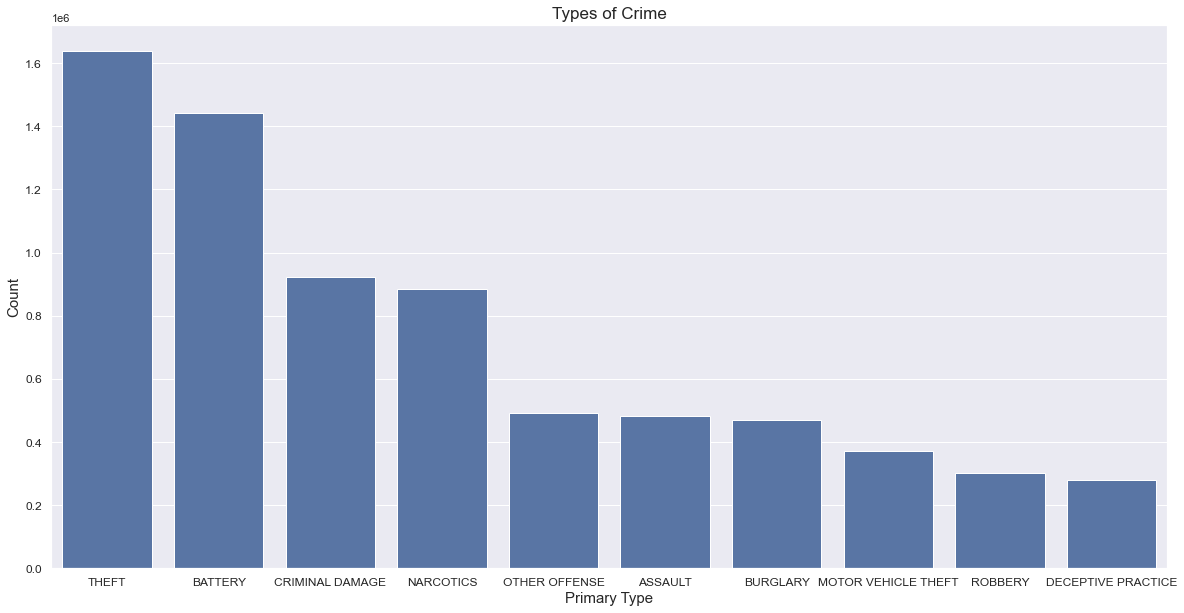

In [41]:
plt.figure(figsize=(20, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = 'Primary Type', order = df['Primary Type'].value_counts().iloc[:10].index, data=df, color='b')
ax.set_title('Types of Crime', fontsize=17)
ax.tick_params(labelsize=12)
ax.set_xlabel(xlabel = 'Primary Type', fontsize=15)
ax.set_ylabel(ylabel = 'Count', fontsize=15)


Text(0, 0.5, 'Location Description')

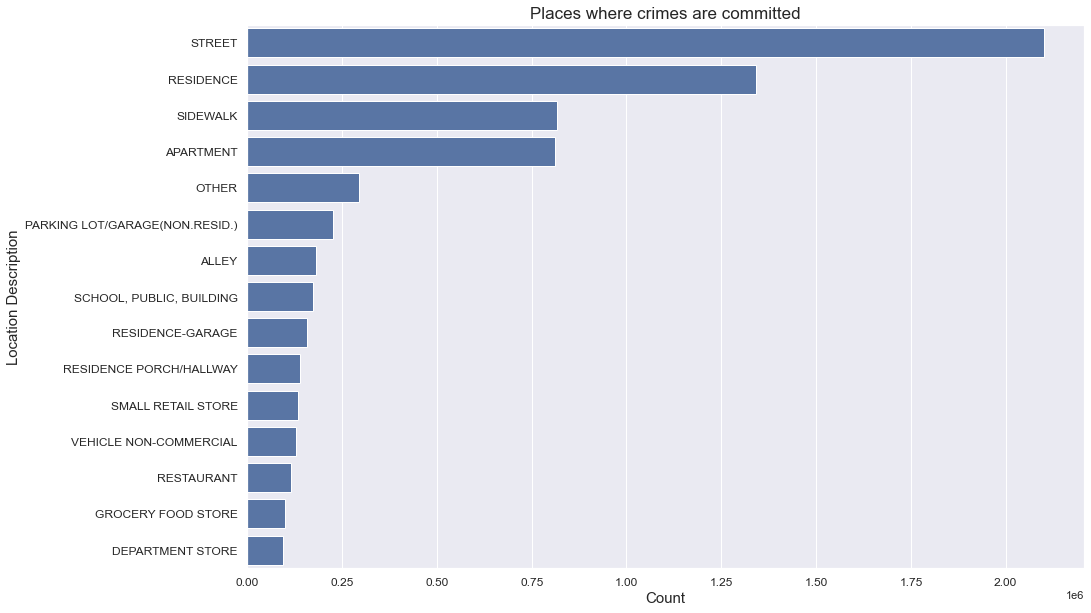

In [42]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y = 'Location Description', order = df['Location Description'].value_counts().iloc[:15].index, data=df, color='b')
ax.set_title('Places where crimes are committed', fontsize=17)
ax.tick_params(labelsize=12)
ax.set_xlabel(xlabel = 'Count', fontsize=15)
ax.set_ylabel(ylabel = 'Location Description', fontsize=15)


Text(0.5, 1.0, 'Number of crimes per year')

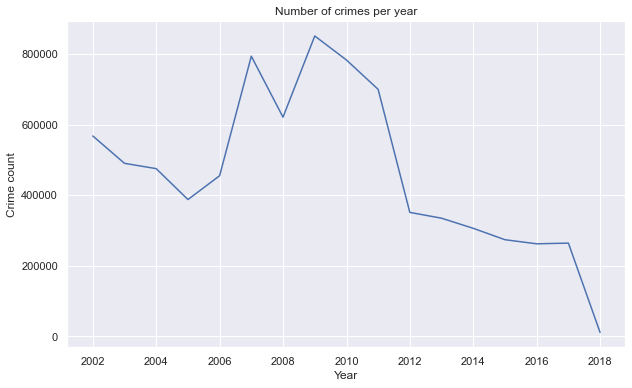

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(df.resample('Y').size())
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.title('Number of crimes per year')

Text(0.5, 1.0, 'Number of crimes per month')

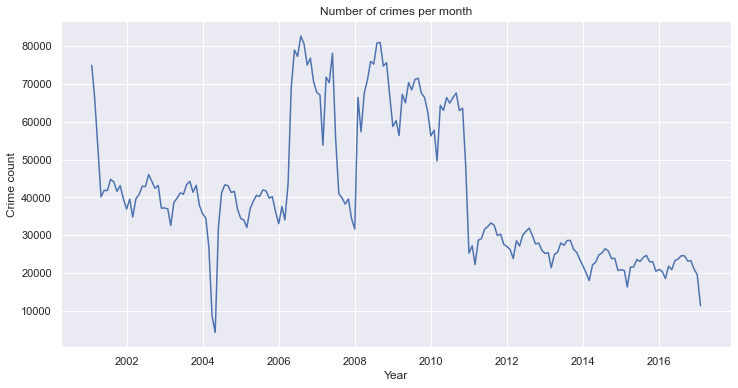

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df.resample('M').size())
plt.ylabel('Crime count')
plt.xlabel('Year')
plt.title('Number of crimes per month')

In [45]:
time_series_df = df.resample('M').size().reset_index() #Create dataframe for crimes per month
time_series_df.columns = ['Date', 'Crime count'] 

In [46]:
len(time_series_df)

193

In [47]:
time_series_df.head()

,Date,Crime count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53120
3,2001-04-30,40166
4,2001-05-31,41876


### FBProphet Model

In [48]:
from prophet import Prophet 

In [49]:
#make training and testing datasets
train = time_series_df[:181] 
test = time_series_df[181:]
train

,Date,Crime count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53120
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
176,2015-09-30,22979
177,2015-10-31,22963
178,2015-11-30,20453
179,2015-12-31,20956


In [50]:
train = train.rename(columns={"Date":'ds', "Crime count":'y'})

In [51]:
m = Prophet()

In [52]:
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [53]:
future = m.make_future_dataframe(periods=12, freq='M') #Make future of prediction for 12 steps on a monthly frequency
forecast = m.predict(future)

In [54]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40564.742989,21473.340386,54785.037477,40564.742989,40564.742989,-814.184429,-814.184429,-814.184429,-814.184429,-814.184429,-814.184429,0.0,0.0,0.0,39750.558560
1,2001-02-28,40715.215950,18164.282099,51180.703286,40715.215950,40715.215950,-6609.140821,-6609.140821,-6609.140821,-6609.140821,-6609.140821,-6609.140821,0.0,0.0,0.0,34106.075129
2,2001-03-31,40881.811013,23162.999093,55436.700970,40881.811013,40881.811013,-2143.547167,-2143.547167,-2143.547167,-2143.547167,-2143.547167,-2143.547167,0.0,0.0,0.0,38738.263846
3,2001-04-30,41043.032043,22798.420780,55348.272696,41043.032043,41043.032043,-1426.374212,-1426.374212,-1426.374212,-1426.374212,-1426.374212,-1426.374212,0.0,0.0,0.0,39616.657831
4,2001-05-31,41209.627106,29620.714957,60263.575856,41209.627106,41209.627106,4154.608672,4154.608672,4154.608672,4154.608672,4154.608672,4154.608672,0.0,0.0,0.0,45364.235778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2016-09-30,12264.379398,-2016.867755,29182.696882,12108.844740,12430.930558,1093.166891,1093.166891,1093.166891,1093.166891,1093.166891,1093.166891,0.0,0.0,0.0,13357.546290
189,2016-10-31,11774.258725,-2602.299368,29865.500880,11581.050662,11992.772842,1584.347660,1584.347660,1584.347660,1584.347660,1584.347660,1584.347660,0.0,0.0,0.0,13358.606385
190,2016-11-30,11299.948395,-7941.396109,24067.821290,11069.988306,11568.929468,-2899.862592,-2899.862592,-2899.862592,-2899.862592,-2899.862592,-2899.862592,0.0,0.0,0.0,8400.085804
191,2016-12-31,10809.827722,-12804.250081,20917.326601,10532.357467,11118.689553,-6501.277196,-6501.277196,-6501.277196,-6501.277196,-6501.277196,-6501.277196,0.0,0.0,0.0,4308.550526


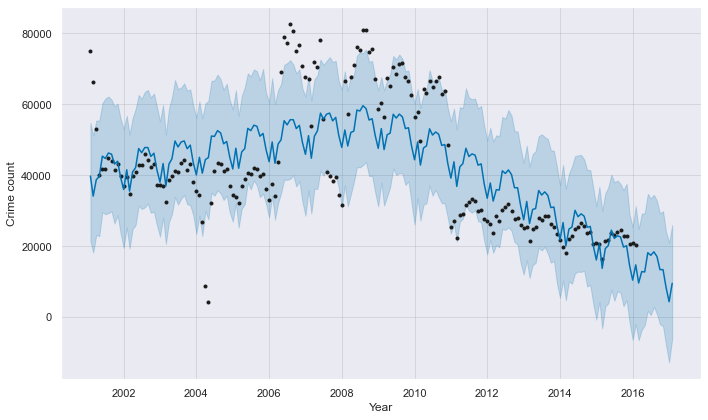

In [55]:
figure = m.plot(forecast, xlabel = "Year", ylabel = 'Crime count') #plot forecast

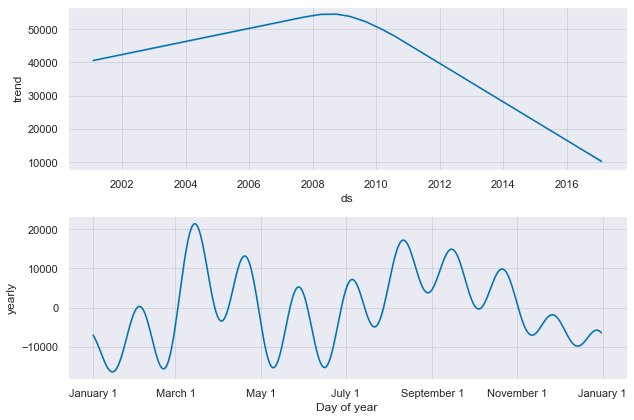

In [56]:
plot = m.plot_components(forecast) #Plot trends

In [57]:
pred_df = pd.DataFrame(forecast)
pred_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40564.742989,21473.340386,54785.037477,40564.742989,40564.742989,-814.184429,-814.184429,-814.184429,-814.184429,-814.184429,-814.184429,0.0,0.0,0.0,39750.558560
1,2001-02-28,40715.215950,18164.282099,51180.703286,40715.215950,40715.215950,-6609.140821,-6609.140821,-6609.140821,-6609.140821,-6609.140821,-6609.140821,0.0,0.0,0.0,34106.075129
2,2001-03-31,40881.811013,23162.999093,55436.700970,40881.811013,40881.811013,-2143.547167,-2143.547167,-2143.547167,-2143.547167,-2143.547167,-2143.547167,0.0,0.0,0.0,38738.263846
3,2001-04-30,41043.032043,22798.420780,55348.272696,41043.032043,41043.032043,-1426.374212,-1426.374212,-1426.374212,-1426.374212,-1426.374212,-1426.374212,0.0,0.0,0.0,39616.657831
4,2001-05-31,41209.627106,29620.714957,60263.575856,41209.627106,41209.627106,4154.608672,4154.608672,4154.608672,4154.608672,4154.608672,4154.608672,0.0,0.0,0.0,45364.235778


In [58]:
pred_df = pred_df[['ds', 'yhat']].set_index('ds') #Get predicted values
pred_df

,yhat
ds,
2001-01-31,39750.558560
2001-02-28,34106.075129
2001-03-31,38738.263846
2001-04-30,39616.657831
2001-05-31,45364.235778
...,...
2016-09-30,13357.546290
2016-10-31,13358.606385
2016-11-30,8400.085804


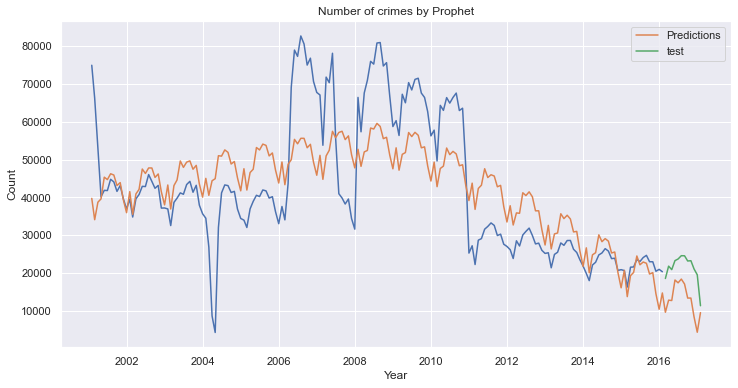

In [62]:
plt.figure(figsize=(12, 6))
a = plt.plot(train['ds'], train['y'])
b = plt.plot(pred_df, label='Predictions')
c = plt.plot(test['Date'], test['Crime count'], label='test')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of crimes by Prophet')
plt.legend()

In [63]:
from sklearn.metrics import mean_squared_error

cc_org = np.array(test['Crime count'])
cc_pred = np.array(pred_df['yhat'][181:])
error = cc_org - cc_pred
mape = np.mean(np.abs(error/cc_org))*100
print('Mean Absolute Percentage Error: %.2f%% '%mape)
print('Root Mean Absolute Percentage Error: %.2f '%mean_squared_error(cc_org, cc_pred, squared=False))

Mean Absolute Percentage Error: 39.34% 
Root Mean Absolute Percentage Error: 9026.30 


### ARIMA Model

In [64]:
import pmdarima as pm

In [65]:
temp = train.set_index('ds')
temp

,y
ds,
2001-01-31,74995
2001-02-28,66288
2001-03-31,53120
2001-04-30,40166
2001-05-31,41876
...,...
2015-09-30,22979
2015-10-31,22963
2015-11-30,20453


In [66]:
model = pm.auto_arima(temp, m=12) #Fit ARIMA model on train for next 12 months 

In [67]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  181
Model:             SARIMAX(1, 1, 2)x(1, 0, [1], 12)   Log Likelihood               -1821.127
Date:                              Mon, 26 Apr 2021   AIC                           3654.254
Time:                                      00:15:28   BIC                           3673.411
Sample:                                           0   HQIC                          3662.021
                                              - 181                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7840      0.110      7.130      0.000       0.569       1.000
ma.L1         -0.7727      0.120     -6.427      0.000      -1.008      -0.537
ma.L2         -0.1251      0.052     -2.396      0.017      -0.227      -0.023
ar.S.L12       0.9125      0.068     13.509      0.000       0.780       1.045
ma.S.L12      -0.8167      0.103     -7.917      0.000      -1.019      -0.614
sigma2      4.178e+07   2.41e-09   1.73e+16      0.000    4.18e+07    4.18e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.70   Jarque-Bera (JB):               529.59
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.11   Skew:                             0.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.3e+31. Standard errors may be unstable.
"""

In [68]:
pred_df_arima = pd.DataFrame(model.predict(n_periods=12), index=test.Date, columns=['predictions']) #Get predictions 

In [69]:
pred_df_arima

,predictions
Date,
2016-02-29,17652.236908
2016-03-31,20664.084560
2016-04-30,20948.894383
2016-05-31,22778.094937
2016-06-30,22303.677961
2016-07-31,22829.754788
2016-08-31,22666.793073
2016-09-30,21294.622777
2016-10-31,21351.910516


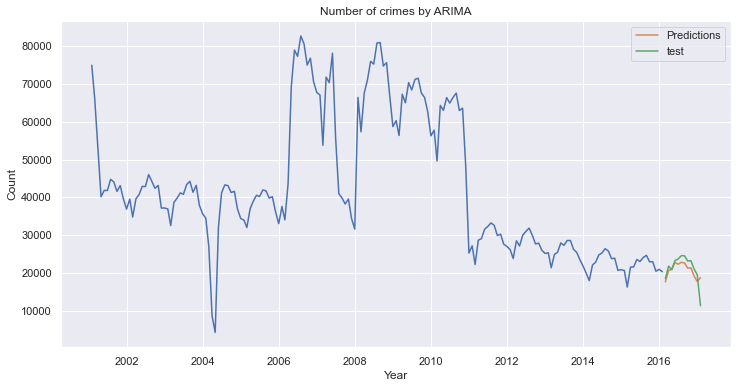

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'])
plt.plot(pred_df_arima, label='Predictions')
plt.plot(test['Date'], test['Crime count'], label='test')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of crimes by ARIMA')
plt.legend()

In [72]:
from sklearn.metrics import mean_squared_error

cc_org = np.array(test['Crime count'])
cc_pred_arima = np.array(pred_df_arima['predictions'])
error_arima = cc_org - cc_pred_arima
mape_arima = np.mean(np.abs(error_arima/cc_org))*100
print('Mean Absolute Percentage Error: %.2f%% '%mape)
print('Root Mean Absolute Percentage Error: %.2f '%mean_squared_error(cc_org, cc_pred_arima, squared=False))

Mean Absolute Percentage Error: 39.34% 
Root Mean Absolute Percentage Error: 2588.72 


### LSTM Implementation

In [110]:
# Create train and test set
data_lstm = time_series_df.set_index('Date')

train_lstm = data_lstm.iloc[:-12]
test_lstm = data_lstm.iloc[-12:]

In [111]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scaled_train_data = scaler.fit_transform(train_lstm)

In [112]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [113]:
#Create datasets in batches of 12, in other words, we will take past 12 values for predicting 1 step forward
X_train = []
y_train = []
for i in range(12, scaled_train_data.shape[0]):
    X_train.append(scaled_train_data[i-12:i])
    y_train.append(scaled_train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape

(169, 12, 1)

In [114]:
# Create model for LSTM
model = Sequential()
model.add(LSTM(264, activation = 'tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=600, batch_size=1) #Train for 500 epochs

Epoch 1/600
169/169 [==============================] - 3s 17ms/sample - loss: 0.0325
Epoch 2/600
169/169 [==============================] - 3s 15ms/sample - loss: 0.0188
Epoch 3/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0190
Epoch 4/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0135
Epoch 5/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0119
Epoch 6/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0108
Epoch 7/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0114
Epoch 8/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0104
Epoch 9/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0093
Epoch 10/600
169/169 [==============================] - 3s 15ms/sample - loss: 0.0100
Epoch 11/600
169/169 [==============================] - 3s 17ms/sample - loss: 0.0100
Epoch 12/600
169/169 [==============================] - 3s 15ms

169/169 [==============================] - 2s 13ms/sample - loss: 0.0064
Epoch 97/600
169/169 [==============================] - 4s 21ms/sample - loss: 0.0061
Epoch 98/600
169/169 [==============================] - 3s 19ms/sample - loss: 0.0068
Epoch 99/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0057
Epoch 100/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0071
Epoch 101/600
169/169 [==============================] - 3s 17ms/sample - loss: 0.0065
Epoch 102/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0057
Epoch 103/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0062
Epoch 104/600
169/169 [==============================] - 3s 15ms/sample - loss: 0.0065
Epoch 105/600
169/169 [==============================] - 2s 15ms/sample - loss: 0.0059
Epoch 106/600
169/169 [==============================] - 2s 15ms/sample - loss: 0.0054
Epoch 107/600
169/169 [==============================] - 2s 

169/169 [==============================] - 2s 14ms/sample - loss: 0.0032
Epoch 191/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0033
Epoch 192/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0032
Epoch 193/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0032
Epoch 194/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0030
Epoch 195/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0031
Epoch 196/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0033
Epoch 197/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0033
Epoch 198/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0036
Epoch 199/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0032
Epoch 200/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0035
Epoch 201/600
169/169 [==============================] - 

169/169 [==============================] - 2s 11ms/sample - loss: 0.0017
Epoch 285/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0021
Epoch 286/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0021
Epoch 287/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0022
Epoch 288/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0021
Epoch 289/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0019
Epoch 290/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0020
Epoch 291/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0017
Epoch 292/600
169/169 [==============================] - 3s 17ms/sample - loss: 0.0021
Epoch 293/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0019
Epoch 294/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0018
Epoch 295/600
169/169 [==============================] - 

169/169 [==============================] - 2s 14ms/sample - loss: 0.0014
Epoch 379/600
169/169 [==============================] - 3s 15ms/sample - loss: 0.0012
Epoch 380/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0012
Epoch 381/600
169/169 [==============================] - 2s 13ms/sample - loss: 0.0012
Epoch 382/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0014
Epoch 383/600
169/169 [==============================] - 2s 14ms/sample - loss: 0.0012
Epoch 384/600
169/169 [==============================] - 2s 15ms/sample - loss: 0.0013
Epoch 385/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0014
Epoch 386/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0011
Epoch 387/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0016
Epoch 388/600
169/169 [==============================] - 3s 18ms/sample - loss: 0.0012
Epoch 389/600
169/169 [==============================] - 

169/169 [==============================] - 2s 13ms/sample - loss: 9.2881e-04
Epoch 471/600
169/169 [==============================] - 2s 13ms/sample - loss: 6.9228e-04
Epoch 472/600
169/169 [==============================] - 2s 12ms/sample - loss: 8.3321e-04
Epoch 473/600
169/169 [==============================] - 3s 15ms/sample - loss: 7.1446e-04
Epoch 474/600
169/169 [==============================] - 3s 15ms/sample - loss: 9.0539e-04
Epoch 475/600
169/169 [==============================] - 2s 15ms/sample - loss: 9.7282e-04
Epoch 476/600
169/169 [==============================] - 2s 14ms/sample - loss: 6.8715e-04
Epoch 477/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0022
Epoch 478/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0012
Epoch 479/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0011
Epoch 480/600
169/169 [==============================] - 2s 12ms/sample - loss: 0.0011
Epoch 481/600
169/169 [======

169/169 [==============================] - 3s 15ms/sample - loss: 4.5983e-04
Epoch 561/600
169/169 [==============================] - 2s 12ms/sample - loss: 5.6154e-04
Epoch 562/600
169/169 [==============================] - 2s 15ms/sample - loss: 5.3118e-04
Epoch 563/600
169/169 [==============================] - 3s 15ms/sample - loss: 5.4514e-04
Epoch 564/600
169/169 [==============================] - 2s 12ms/sample - loss: 5.6539e-04
Epoch 565/600
169/169 [==============================] - 3s 16ms/sample - loss: 0.0011
Epoch 566/600
169/169 [==============================] - 2s 13ms/sample - loss: 7.6299e-04
Epoch 567/600
169/169 [==============================] - 2s 13ms/sample - loss: 4.6357e-04
Epoch 568/600
169/169 [==============================] - 2s 13ms/sample - loss: 7.8416e-04
Epoch 569/600
169/169 [==============================] - 2s 14ms/sample - loss: 7.0974e-04
Epoch 570/600
169/169 [==============================] - 2s 13ms/sample - loss: 5.4801e-04
Epoch 571/600
169

In [115]:
y_train_preds = model.predict(X_train) #Get predictions

In [116]:
q1 = scaler.inverse_transform(y_train_preds)
df_pred = pd.DataFrame(q1, index=train_lstm.index[12:])
df_pred

,0
Date,
2002-01-31,39978.085938
2002-02-28,40504.613281
2002-03-31,38414.316406
2002-04-30,42518.359375
2002-05-31,42522.277344
...,...
2015-09-30,22959.199219
2015-10-31,22080.101562
2015-11-30,20818.779297


In [117]:
test_frame = pd.concat([test_lstm, train_lstm.iloc[-12:]])
test_scaled = scaler.transform(test_frame)
test_scaled

array([[0.18203126],
       [0.22377489],
       [0.21194094],
       [0.24230921],
       [0.24781219],
       [0.25897099],
       [0.25862706],
       [0.24112454],
       [0.24197801],
       [0.21438671],
       [0.19451486],
       [0.09021311],
       [0.15311517],
       [0.22015719],
       [0.22097245],
       [0.24601608],
       [0.23944308],
       [0.25271646],
       [0.26011745],
       [0.23861508],
       [0.23841127],
       [0.20643797],
       [0.21284537],
       [0.20490937]])

In [118]:
X_test = []
y_test = []
for i in range(12, test_scaled.shape[0]):
    X_test.append(test_scaled[i-12:i])
    y_test.append(test_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test

((12, 12, 1),
 array([0.15311517, 0.22015719, 0.22097245, 0.24601608, 0.23944308,
        0.25271646, 0.26011745, 0.23861508, 0.23841127, 0.20643797,
        0.21284537, 0.20490937]))

In [119]:
y_test_preds = model.predict(X_test)

In [120]:
q2 = scaler.inverse_transform(y_test_preds)
df_pred_test = pd.DataFrame(q2, index=test_lstm.index, columns=['yhat'])
#df_pred_test
df_pred_test

,yhat
Date,
2016-02-29,14318.199219
2016-03-31,20722.113281
2016-04-30,21061.923828
2016-05-31,21873.162109
2016-06-30,23626.132812
2016-07-31,24660.472656
2016-08-31,23369.986328
2016-09-30,22149.810547
2016-10-31,21550.091797


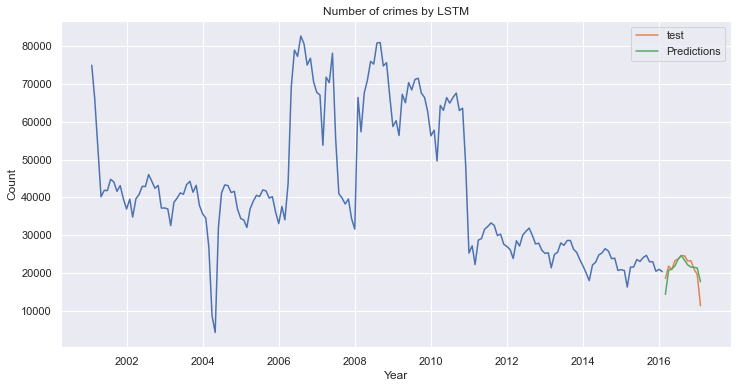

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(train['ds'], train['y'])
plt.plot(test['Date'], test['Crime count'], label='test')
plt.plot(df_pred_test, label='Predictions')
plt.ylabel('Count')
plt.xlabel('Year')
plt.title('Number of crimes by LSTM')
plt.legend()

In [122]:
q2,  

(array([[14318.199],
        [20722.113],
        [21061.924],
        [21873.162],
        [23626.133],
        [24660.473],
        [23369.986],
        [22149.81 ],
        [21550.092],
        [21508.691],
        [21302.17 ],
        [17654.678]], dtype=float32),)

In [123]:
arr_org = test["Crime count"].to_numpy()
arr_preds_lstm = df_pred_test['yhat'].to_numpy()

In [124]:
from sklearn.metrics import mean_squared_error
error_lstm = arr_org - arr_preds_lstm
mape_lstm = np.mean(np.abs(error_lstm/arr_org))*100
rmse_LSTM = mean_squared_error(test['Crime count'], df_pred_test, squared=False)
print("MAPE = %.2f%%"%mape_lstm)
print("RMSE = %.2f"%rmse_LSTM)

MAPE = 9.90%
RMSE = 2409.73


In [130]:
r1 = ['FBProphet', round(np.mean(np.abs(error/cc_org))*100, 3), round(mean_squared_error(cc_org, cc_pred, squared=False), 3)]
r2 = ['ARIMA', round(np.mean(np.abs(error_arima/cc_org))*100, 3), round(mean_squared_error(cc_org, cc_pred_arima, squared=False), 3)]
r3 = ['LSTM', round(mape_lstm, 3), round(rmse_LSTM, 3)]

In [131]:
metric_df = pd.DataFrame([r1, r2, r3],  columns=['Model', 'MAPE', 'RMSE'])

In [132]:
metric_df.index = metric_df['Model']

In [133]:
metric_df = metric_df.drop(['Model'], axis=1)

In [134]:
metric_df

,MAPE,RMSE
Model,,
FBProphet,39.336,9026.302
ARIMA,11.113,2588.719
LSTM,9.901,2409.730
